# **Weather Prediction**

### Visualize the state transition chart:

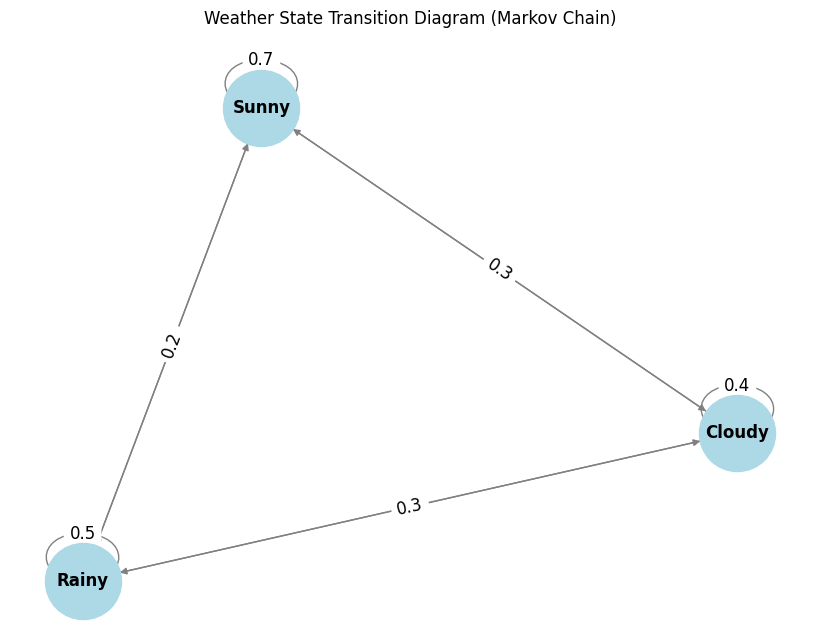

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define states
states = ["Sunny", "Cloudy", "Rainy"]

# Define transition matrix
transition_matrix = np.array([
    [0.7, 0.2, 0.1],  # Sunny -> Sunny (70%), Cloudy (20%), Rainy (10%)
    [0.3, 0.4, 0.3],  # Cloudy -> Sunny (30%), Cloudy (40%), Rainy (30%)
    [0.2, 0.3, 0.5]   # Rainy -> Sunny (20%), Cloudy (30%), Rainy (50%)
])

# Create a directed graph
G = nx.DiGraph()

# Add nodes (states)
G.add_nodes_from(states)

# Add edges (state transitions) with probabilities as weights
for i in range(len(states)):
    for j in range(len(states)):
        if transition_matrix[i, j] > 0:  # Only show transitions with probability > 0
            G.add_edge(states[i], states[j], weight=transition_matrix[i, j])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=12, font_weight="bold", edge_color="gray", arrows=True)

# Add edge labels (probabilities)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Weather State Transition Diagram (Markov Chain)")
plt.show()


### Get the predictions based on transition matrix probabilities.

In [ ]:
import random

# Function to predict weather using Markov Chain
def predict_weather(start_state, days):
    current_state = states.index(start_state)
    weather_sequence = [start_state]

    for _ in range(days):
        next_state = np.random.choice(states, p=transition_matrix[current_state])
        weather_sequence.append(next_state)
        current_state = states.index(next_state)

    return weather_sequence

# Simulate weather for the next 10 days starting from "Sunny"
predicted_weather = predict_weather("Sunny", 10)

# Print result
print("Predicted Weather Sequence:", predicted_weather)

Predicted Weather Sequence: ['Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Cloudy']


# **Stock Prediction**

### Get the data

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

# Fetch historical stock data (S&P 500)
ticker = "^GSPC"  # S&P 500 Index
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")["Close"]

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


### Define states based on threshold

In [ ]:
# Define states based on return thresholds
def classify_state(change):
    if change > 0.005:   # More than +0.5% → "Up"
        return "Up"
    elif change < -0.005: # Less than -0.5% → "Down"
        return "Down"
    else:
        return "Stable"

# Apply state classification
returns = data.pct_change().dropna().squeeze()  # Convert to Series
states = returns.apply(classify_state)

### Compute transition matrix

In [ ]:
# Compute transition probabilities
state_counts = pd.crosstab(states.shift(), states, normalize=0)

# Convert to a numpy matrix
transition_matrix = state_counts.fillna(0).to_numpy()
state_labels = state_counts.columns.to_list()

print("Transition Matrix:\n", transition_matrix)

Transition Matrix:
 [[0.25       0.44642857 0.30357143]
 [0.23529412 0.49579832 0.26890756]
 [0.19178082 0.49315068 0.31506849]]


### Predict according to MC approach

In [ ]:
# Predict future trends using Markov Chain
def predict_trends(start_state, days):
    current_state = state_labels.index(start_state)
    trend_sequence = [start_state]

    for _ in range(days):
        next_state = np.random.choice(state_labels, p=transition_matrix[current_state])
        trend_sequence.append(next_state)
        current_state = state_labels.index(next_state)

    return trend_sequence

# Predict trends for the next 10 days starting from "Up"
predicted_trends = predict_trends("Up", 10)
print("\nPredicted Trends:", predicted_trends)


Predicted Trends: ['Up', 'Stable', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Stable', 'Stable', 'Down']


### Visualize the transition state chart

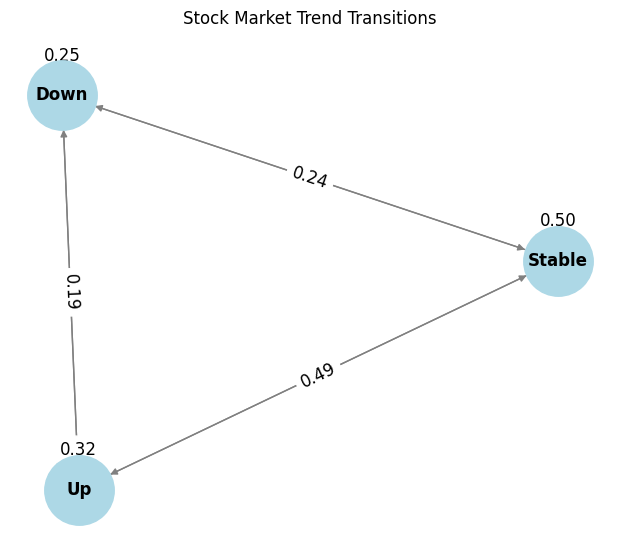

In [ ]:
# Visualizing the state transitions
G = nx.DiGraph()
G.add_nodes_from(state_labels)

# Add edges with probabilities
for i, from_state in enumerate(state_labels):
    for j, to_state in enumerate(state_labels):
        prob = transition_matrix[i, j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=round(prob, 2))

plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2500, font_size=12, font_weight="bold", edge_color="gray", arrows=True)

# Add edge labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Stock Market Trend Transitions")
plt.show()

# **Text Generation with Markov Chains (Chatbot-like responses)**

### Build a small sample dataset and preprocess it

In [ ]:
import random
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample text dataset (You can replace this with a larger dataset)
text = """
Hey, how are you? I hope you are doing great!
Are you free today? Let's go out and have some fun.
Yes, let's go for a movie. What do you want to watch?
Maybe a comedy or a thriller? I love thrillers!
Sounds great, let's book the tickets!
"""

# Preprocess text: Remove punctuation & lowercase
text = re.sub(r'[^\w\s]', '', text.lower())
words = text.split()

### Build the markov chain model

In [ ]:
# Build Markov Chain model
markov_chain = defaultdict(lambda: [])
for i in range(len(words) - 1):
    markov_chain[words[i]].append(words[i + 1])

# Convert to transition probabilities
transition_matrix = {}
for word, next_words in markov_chain.items():
    unique_words, counts = np.unique(next_words, return_counts=True)
    transition_matrix[word] = dict(zip(unique_words, counts / counts.sum()))

### Generate response

In [ ]:
# Function to generate text using Markov Chain
def generate_text(start_word, length=10):
    if start_word not in transition_matrix:
        return "Start word not in dataset!"

    sentence = [start_word]
    for _ in range(length - 1):
        next_word = np.random.choice(list(transition_matrix[start_word].keys()), p=list(transition_matrix[start_word].values()))
        sentence.append(next_word)
        start_word = next_word
        if start_word not in transition_matrix:  # Stop if no transitions available
            break
    return ' '.join(sentence)

# Example: Generate text starting from "let's"
generated_sentence = generate_text("lets", 15)
print("Generated Text:\n", generated_sentence)

Generated Text:
 lets go for a movie what do you free today lets book the tickets


### Visualize the markov chain

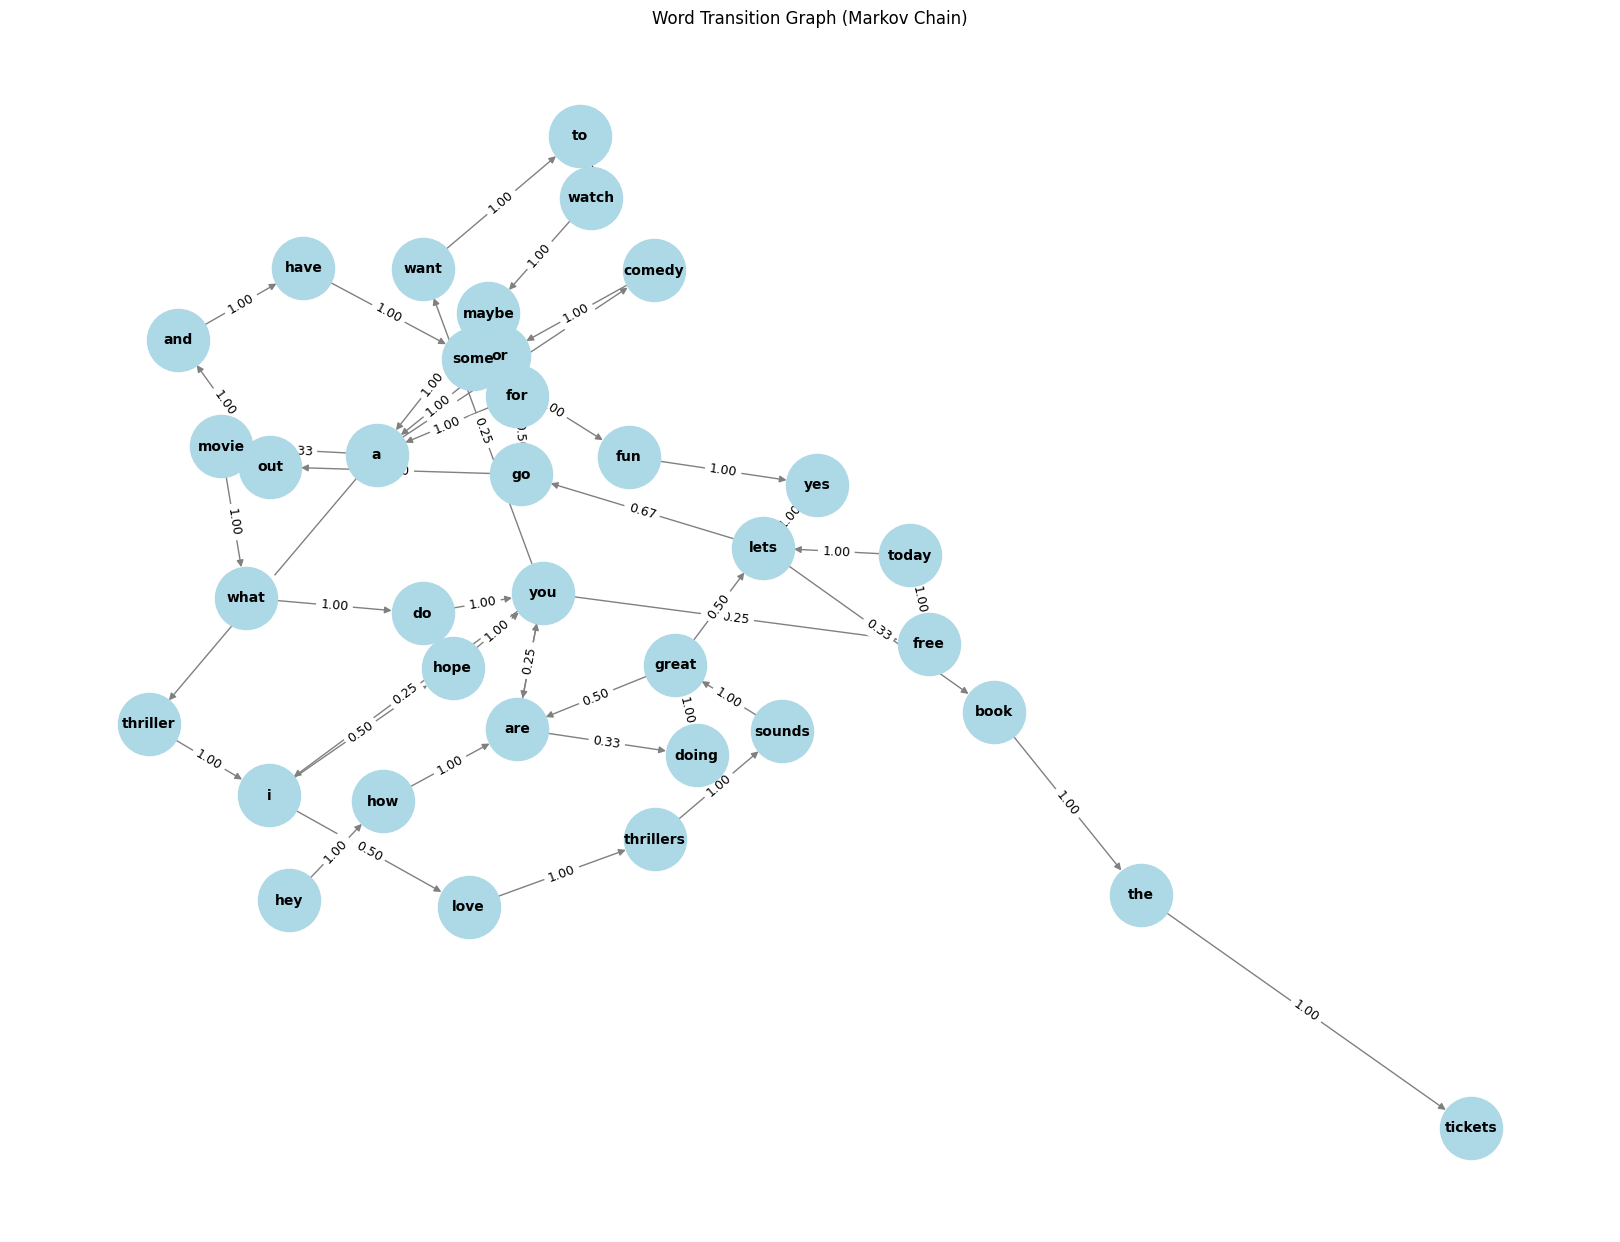

In [ ]:
# Visualize the Markov Chain
G = nx.DiGraph()
for word, transitions in transition_matrix.items():
    for next_word, prob in transitions.items():
        G.add_edge(word, next_word, weight=round(prob, 2))

plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10, font_weight="bold", edge_color="gray", arrows=True)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Word Transition Graph (Markov Chain)")
plt.show()

# **AI-Generated Song Lyrics**

### Small sample dataset

In [ ]:
import numpy as np
import random
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample song lyrics (You can replace this with real lyrics from a dataset)
lyrics = """
I see the stars, they shine so bright
Lost in the night, I hold you tight
Dreaming away, through time and space
Love is a melody, a sweet embrace

Oh baby, don't you cry
We'll dance under the moonlit sky
Every heartbeat, every rhyme
Together forever, beyond all time
"""

# Preprocess lyrics: Remove punctuation & lowercase
lyrics = re.sub(r'[^\w\s]', '', lyrics.lower())
words = lyrics.split()

### Build the markov chain model

In [ ]:
# Build Markov Chain model
markov_chain = defaultdict(lambda: [])
for i in range(len(words) - 1):
    markov_chain[words[i]].append(words[i + 1])

# Convert to transition probabilities
transition_matrix = {}
for word, next_words in markov_chain.items():
    unique_words, counts = np.unique(next_words, return_counts=True)
    transition_matrix[word] = dict(zip(unique_words, counts / counts.sum()))

### Generate lyrics

In [ ]:
# Function to generate lyrics using Markov Chain
def generate_lyrics(start_word, length=20):
    if start_word not in transition_matrix:
        return "Start word not in dataset!"

    sentence = [start_word]
    for _ in range(length - 1):
        next_word = np.random.choice(list(transition_matrix[start_word].keys()), p=list(transition_matrix[start_word].values()))
        sentence.append(next_word)
        start_word = next_word
        if start_word not in transition_matrix:  # Stop if no transitions available
            break
    return ' '.join(sentence)

# Example: Generate lyrics starting from "love"
generated_lyrics = generate_lyrics("beyond", 15)
print("Generated Lyrics:\n", generated_lyrics)

Generated Lyrics:
 beyond all time and space love is a sweet embrace oh baby dont you cry


### Visualize the markov chain:

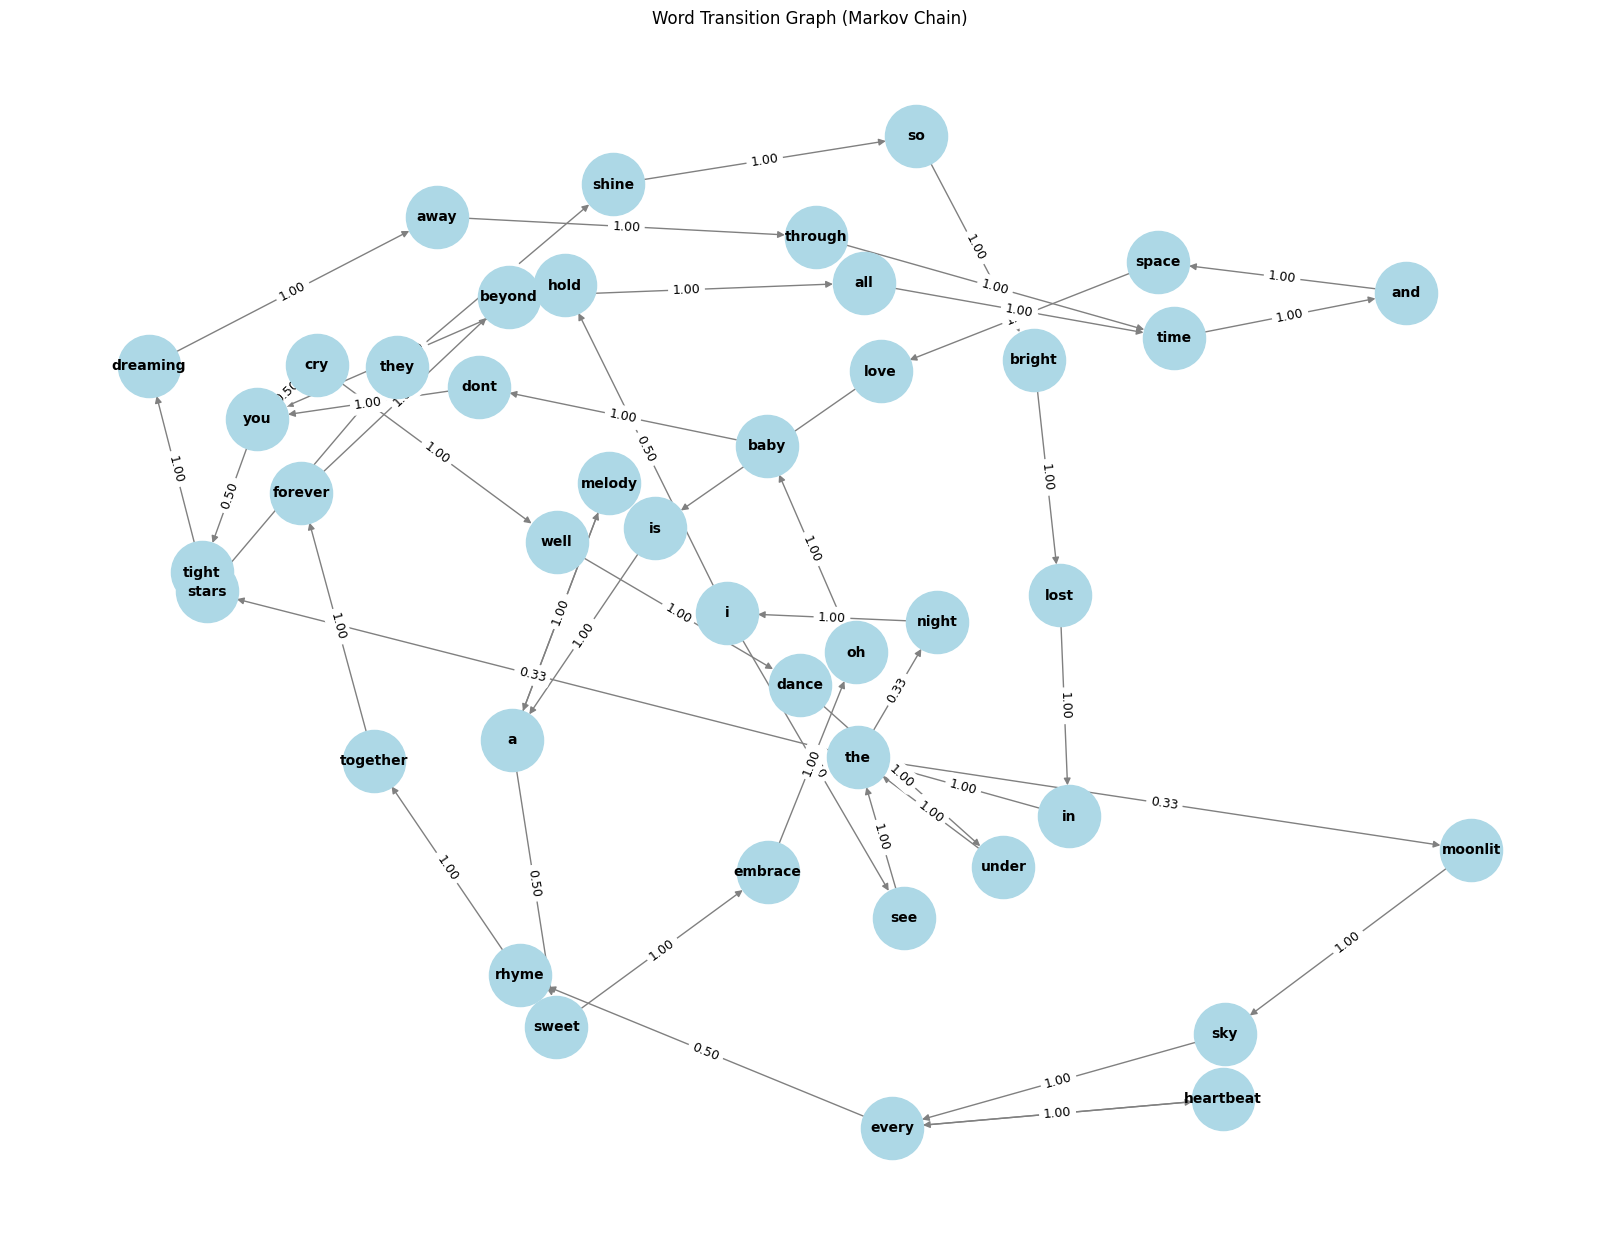

In [ ]:
# Visualizing the Markov Chain
G = nx.DiGraph()
for word, transitions in transition_matrix.items():
    for next_word, prob in transitions.items():
        G.add_edge(word, next_word, weight=round(prob, 2))

plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10, font_weight="bold", edge_color="gray", arrows=True)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Word Transition Graph (Markov Chain)")
plt.show()

# **News Headline Generator using Markov Chains**

### Sample dataset creation

In [ ]:
import numpy as np
import random
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample news headlines (replace with a real dataset)
headlines = """
Stock market surges as tech giants report record earnings
New study finds link between diet and mental health
Government announces new climate change policy
Artificial Intelligence set to revolutionize healthcare industry
Sports team wins championship after thrilling final match
Scientists discover potential cure for rare disease
"""
# Preprocess: Remove punctuation, lowercase text
headlines = re.sub(r'[^\w\s]', '', headlines.lower())
words = headlines.split()

### Building a markov chain model

In [ ]:
# Build Markov Chain model
markov_chain = defaultdict(lambda: [])
for i in range(len(words) - 1):
    markov_chain[words[i]].append(words[i + 1])

# Convert to transition probabilities
transition_matrix = {}
for word, next_words in markov_chain.items():
    unique_words, counts = np.unique(next_words, return_counts=True)
    transition_matrix[word] = dict(zip(unique_words, counts / counts.sum()))

### Generate headlines

In [ ]:
# Function to generate headlines using Markov Chain
def generate_headline(start_word, length=10):
    if start_word not in transition_matrix:
        return "Start word not in dataset!"

    sentence = [start_word]
    for _ in range(length - 1):
        next_word = np.random.choice(list(transition_matrix[start_word].keys()), p=list(transition_matrix[start_word].values()))
        sentence.append(next_word)
        start_word = next_word
        if start_word not in transition_matrix:  # Stop if no transitions available
            break
    return ' '.join(sentence)

# Example: Generate a headline starting from "stock"
generated_headline = generate_headline("team", 8)
print("Generated Headline:\n", generated_headline)

Generated Headline:
 team wins championship after thrilling final match scientists


### Visualize markov chain

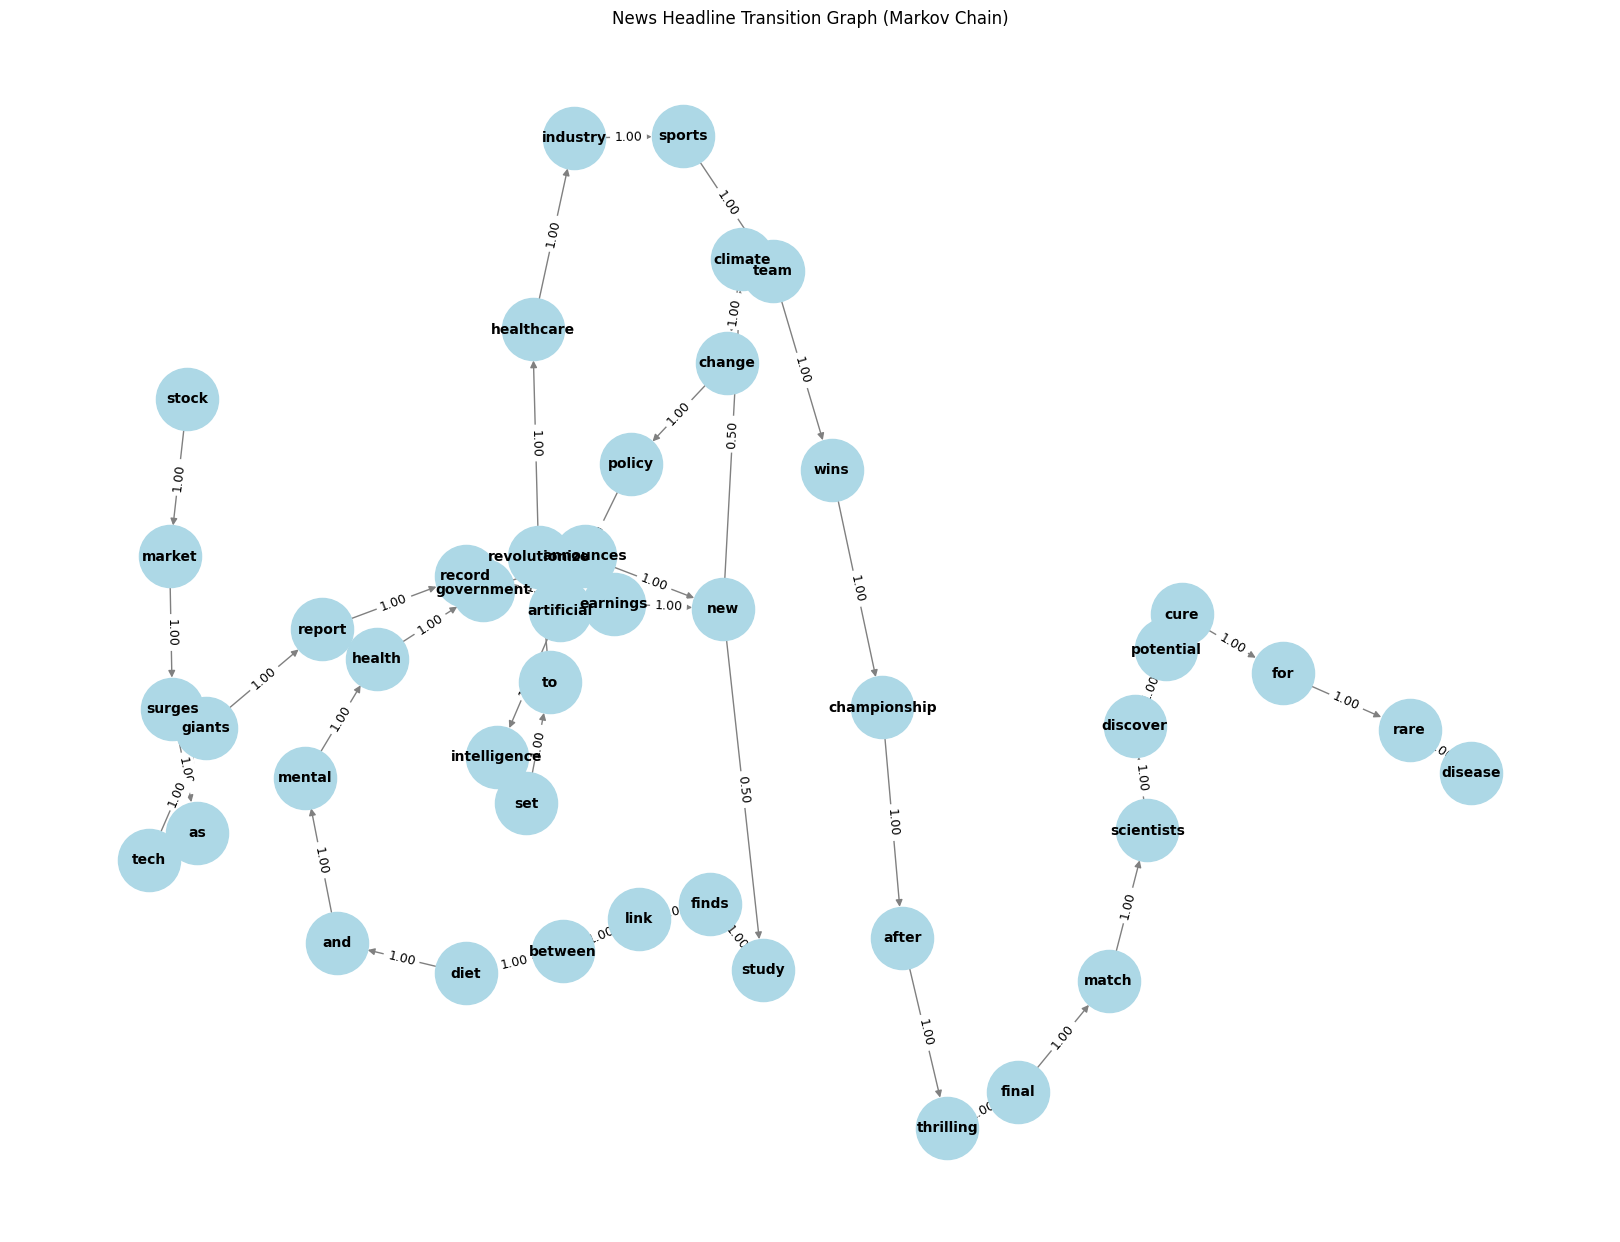

In [ ]:
# Visualizing the Markov Chain
G = nx.DiGraph()
for word, transitions in transition_matrix.items():
    for next_word, prob in transitions.items():
        G.add_edge(word, next_word, weight=round(prob, 2))

plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10, font_weight="bold", edge_color="gray", arrows=True)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("News Headline Transition Graph (Markov Chain)")
plt.show()